# Multiple Linear Regression


## Problem Statement


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:

Essentially, the company wants to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Step 1: Reading and Understanding the Data

Let us first significant Libraries and read the dataset.

In [241]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [242]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
bike = pd.read_csv("day.csv")

In [244]:
# Check the head of the dataset

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [245]:
bike.shape

(730, 16)

In [246]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [247]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Key findings:

1. Bike sharing dataset contains 730 rows and 16 columns.

2. The columns persist to both numerical and categorical data.

3. There are no null values present in the dataset.

4. We will need to amplify the data by dropping irrelevant columns.

5. We will then analyse and convert the columns as per the requirements.

# Step 2: Data Preparation

### Dropping redundant and unnecessary columns

- Instant
- casual 
- registered
- dteday


In [248]:
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [249]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Converting and mapping numeric values of columns season, weathersit, mnth and weekday into categorical string values


In [250]:
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [251]:
bike.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [252]:
bike['weathersit'] = bike['weathersit'].map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})

In [253]:
bike.weathersit.value_counts()

weathersit
clear    463
mist     246
light     21
Name: count, dtype: int64

In [254]:
bike['mnth'] = bike['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [255]:
bike.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [256]:
bike['weekday'] = bike['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [257]:
bike.weekday.value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

In [258]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Data Analysis

### Visualizing the data

<Figure size 1500x1000 with 0 Axes>

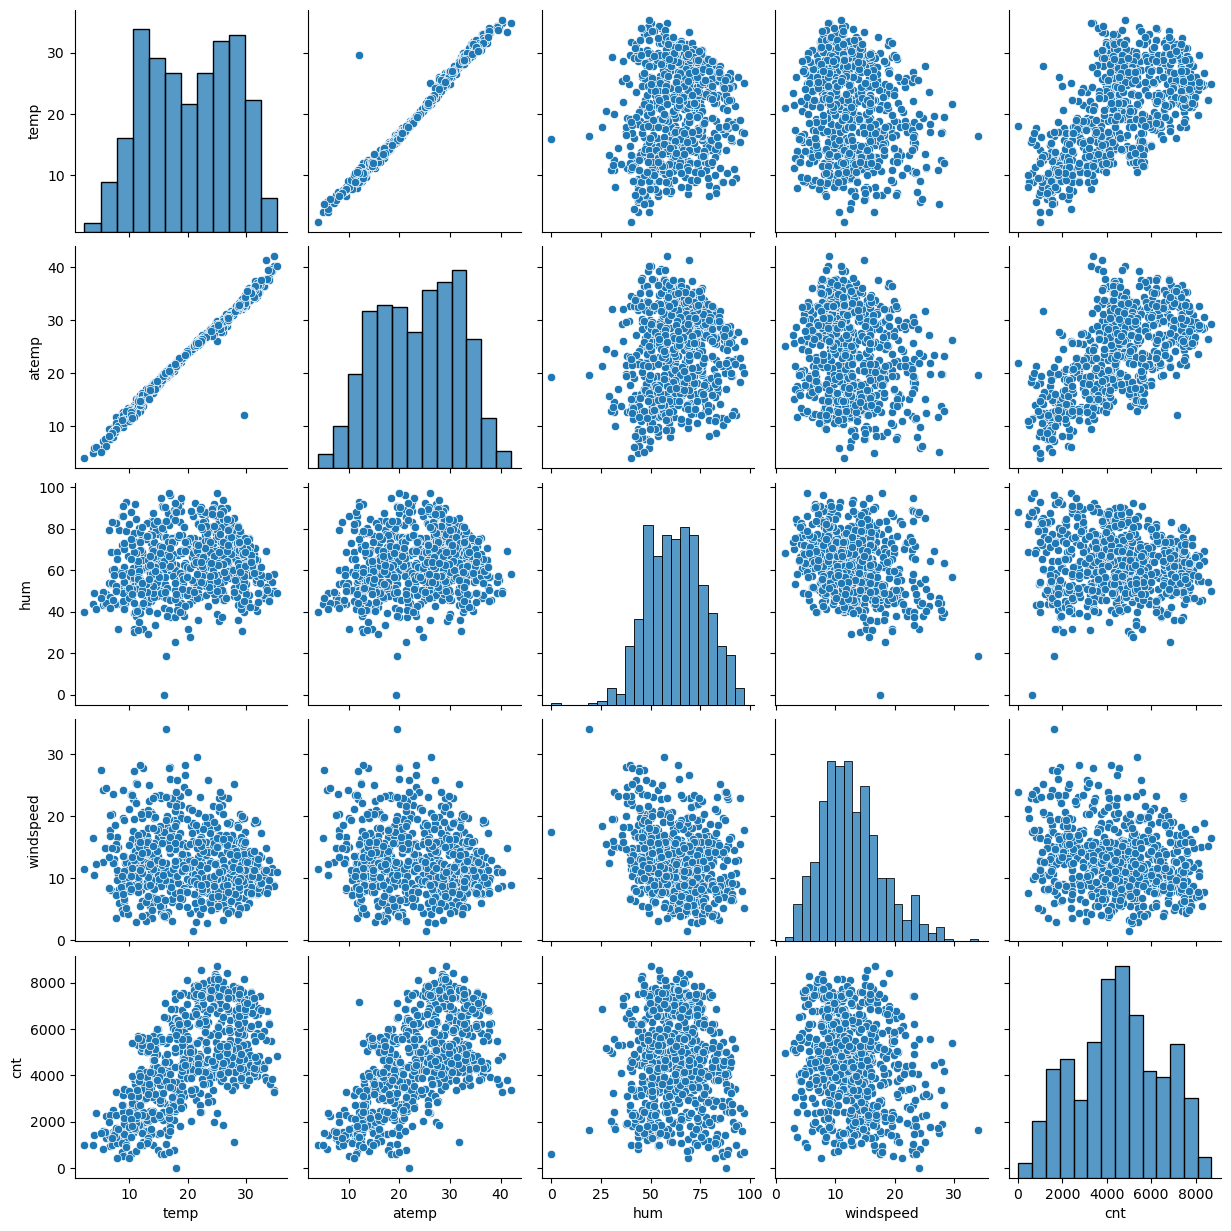

In [259]:
# Create a list of numerical variables 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Visualise correlations among these numerical variables by plotting pairplot

plt.figure(figsize=(15,10))
sns.pairplot(bike[num_vars])
plt.show()

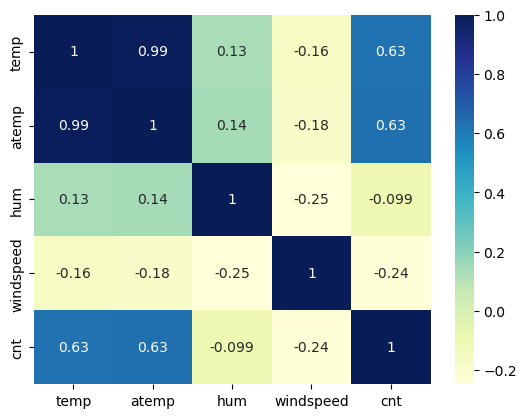

In [260]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGnBu', annot = True)
plt.show()

It is visible that both 'temp' and 'atemp' have highest correlation of 1 and .99 respectively. We can drop 'atemp' for better model building.

In [261]:
bike.drop(['atemp'], axis=1, inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


In [262]:
# Separate out the categorical variables

cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


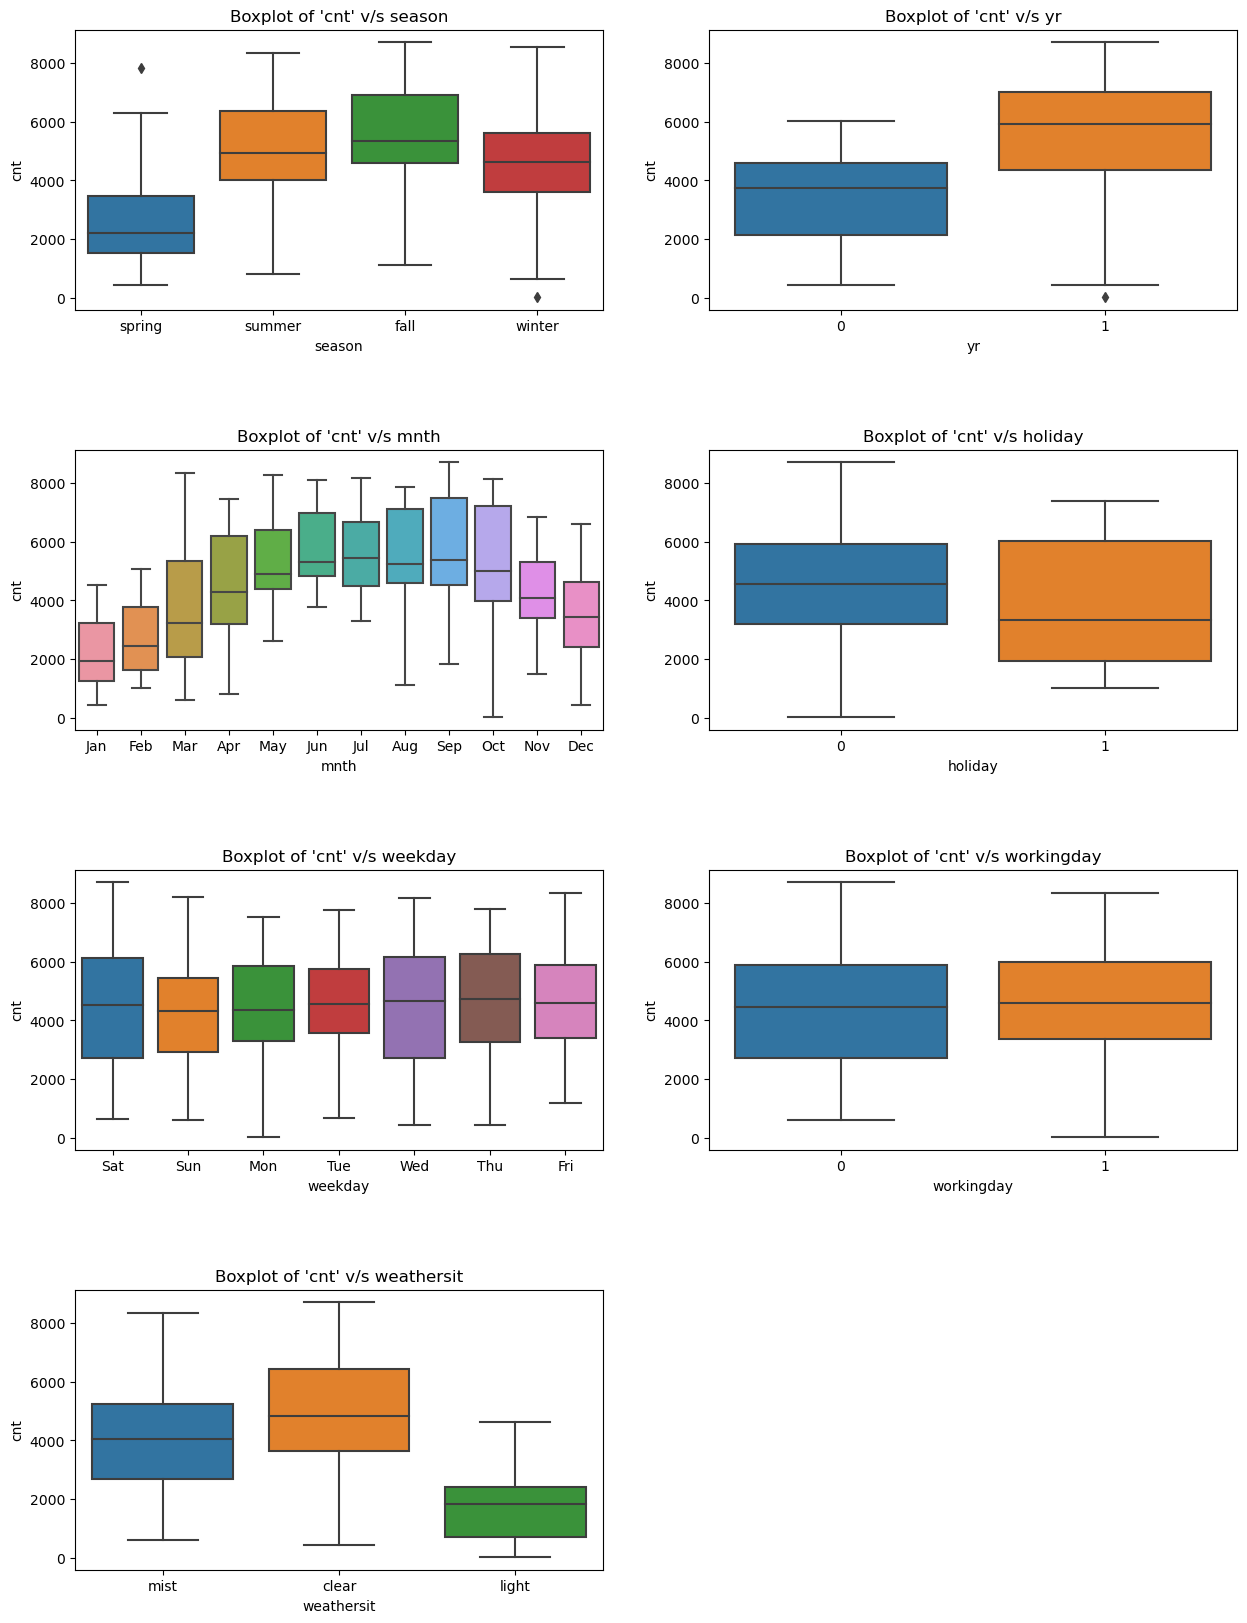

In [263]:
# Plotting Boxplots for each categorical variables

plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=.5)
for i, col in enumerate(cat_vars):
    plt.subplot(4,2,i+1)
    plt.title(label="Boxplot of 'cnt' v/s " + col)
    sns.boxplot(x=col, y='cnt', data=bike);

### Key findings:

1. Most bikes were rented in fall season followed by summer. 
2. Demand for bikes is more in September and October whereas low in the January and December.
3. More number of bikes were rented in 2019 as compared to 2018.
4. Clear weather shows increase in demand for bikes.
5. Holiday and workingday do not show much difference in the rentals.

### Creating dummy variables for all categorical values where categories are > 2

In [264]:
bike = pd.get_dummies(bike, drop_first=True, dtype = int)

In [265]:
bike.shape

(730, 29)

In [266]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   cnt               730 non-null    int64  
 7   season_spring     730 non-null    int32  
 8   season_summer     730 non-null    int32  
 9   season_winter     730 non-null    int32  
 10  mnth_Aug          730 non-null    int32  
 11  mnth_Dec          730 non-null    int32  
 12  mnth_Feb          730 non-null    int32  
 13  mnth_Jan          730 non-null    int32  
 14  mnth_Jul          730 non-null    int32  
 15  mnth_Jun          730 non-null    int32  
 16  mnth_Mar          730 non-null    int32  
 1

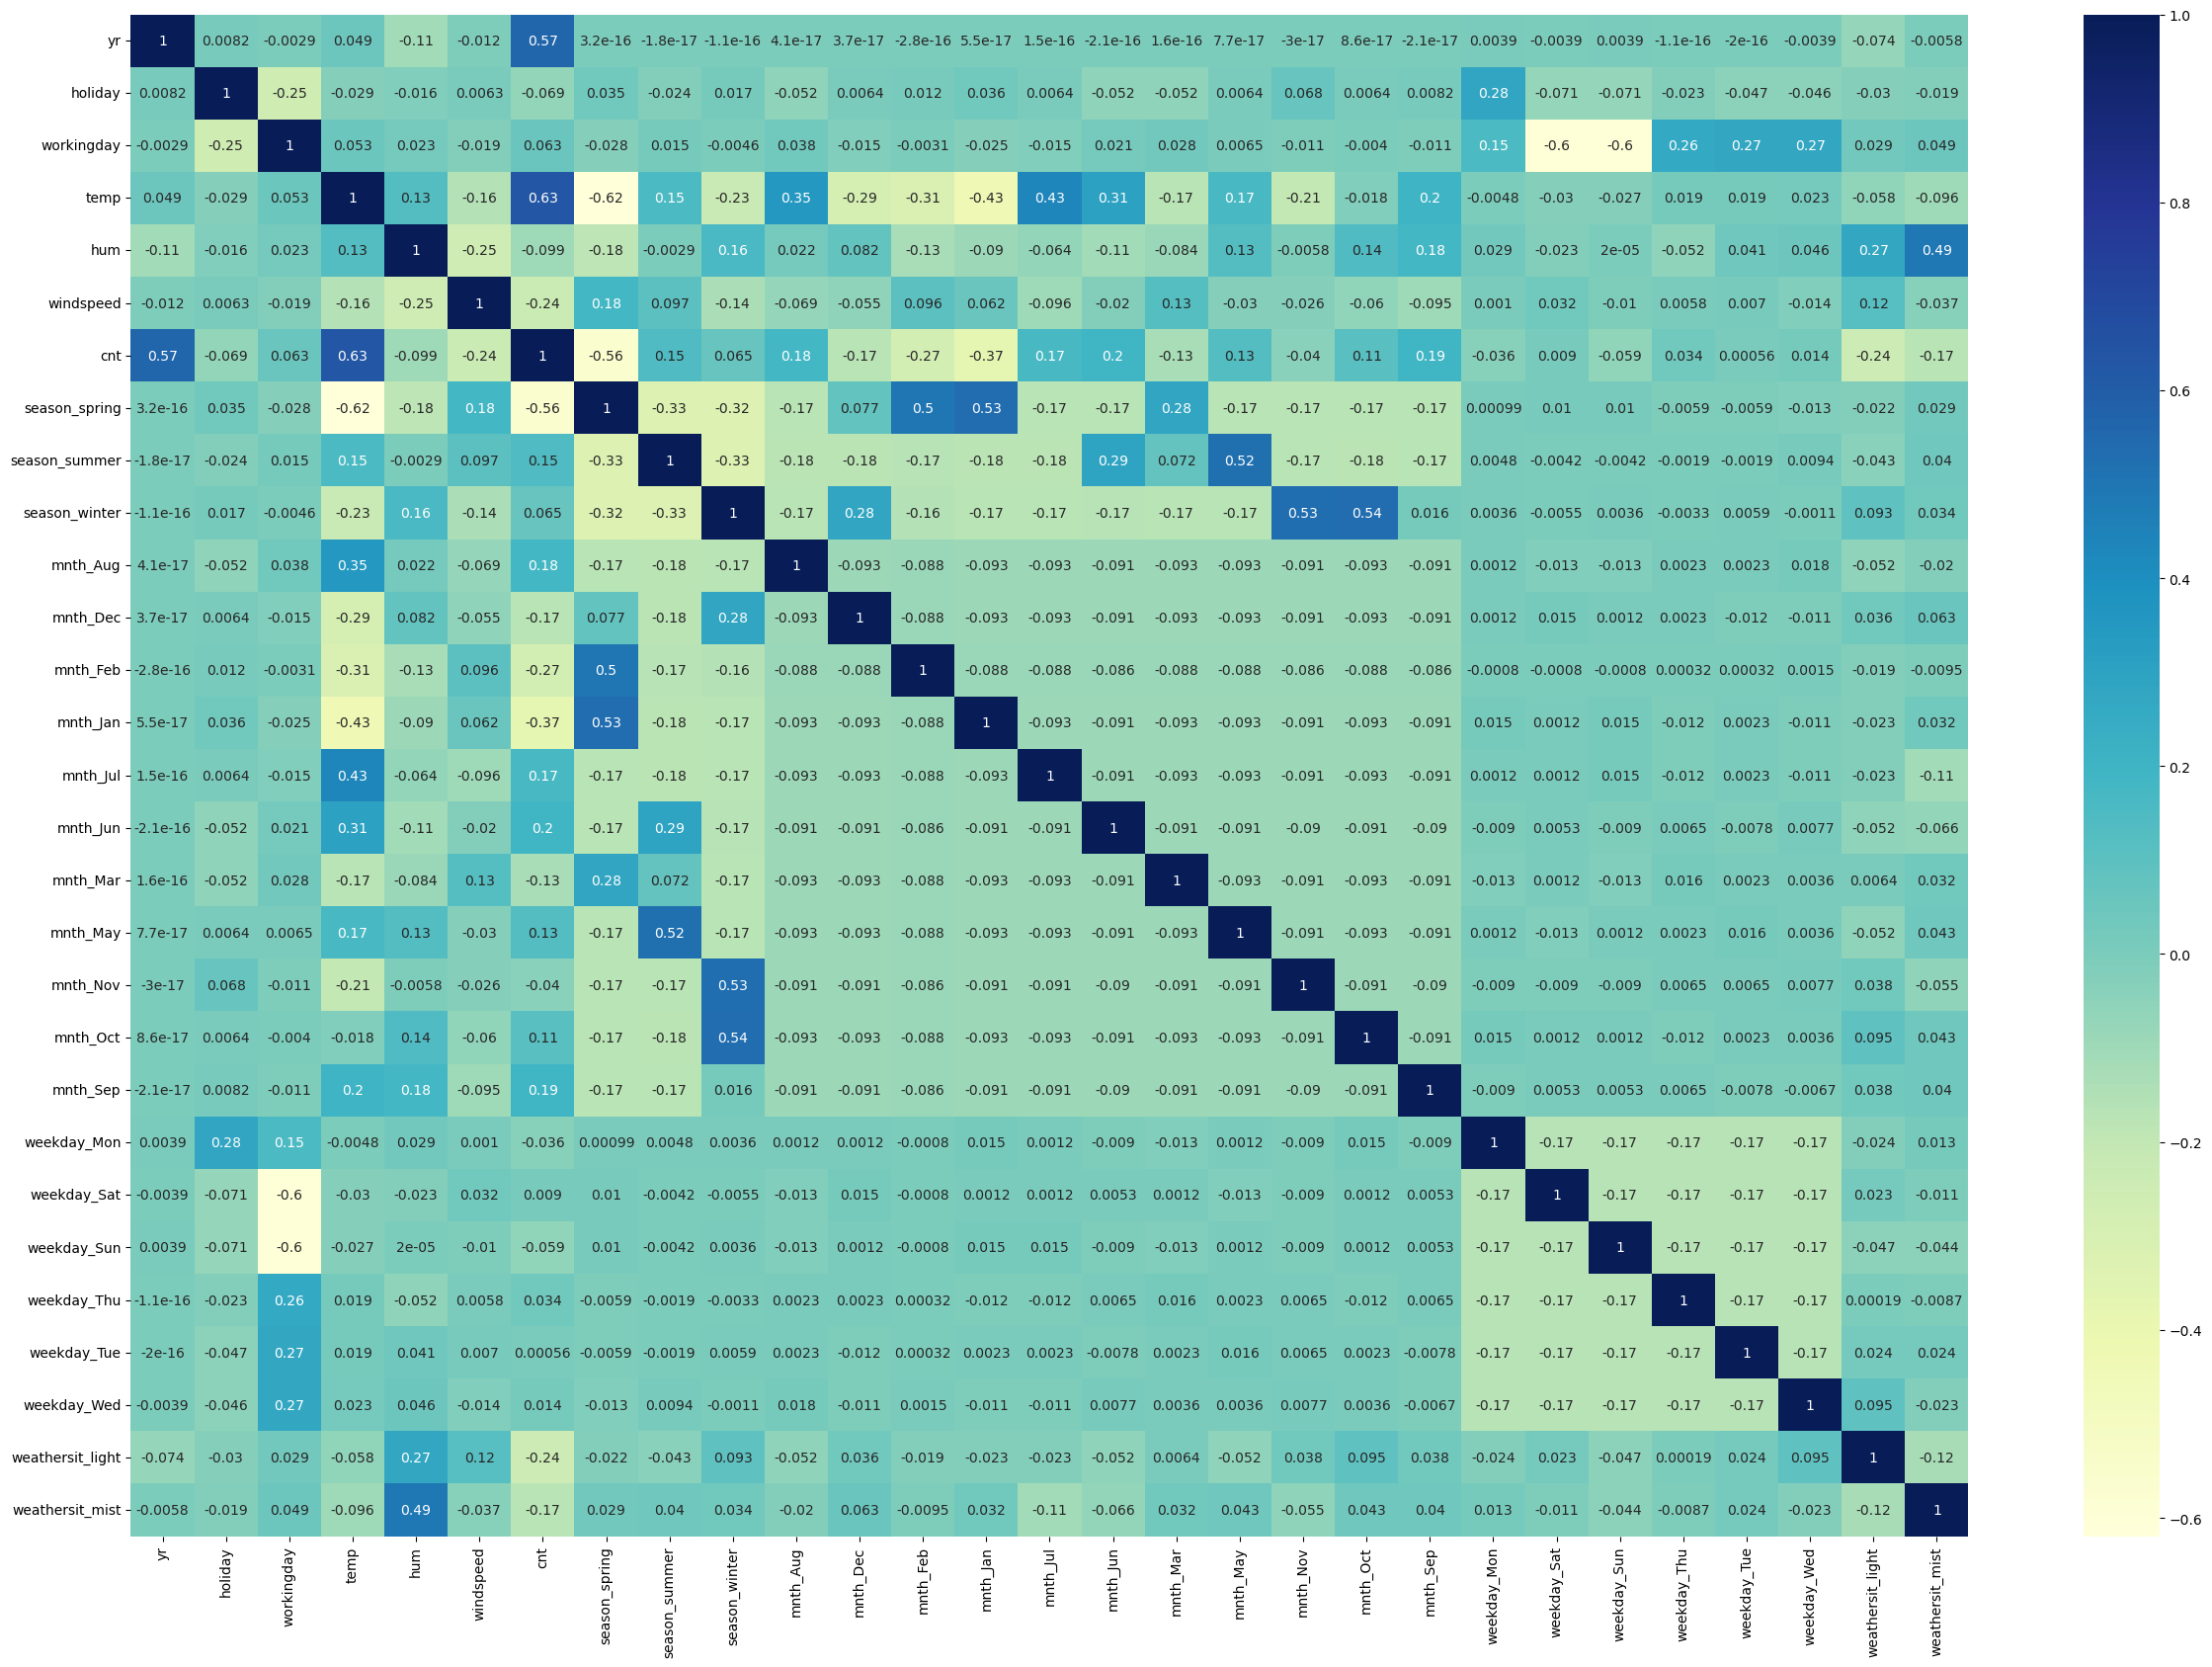

In [267]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Splitting the Data into Training and Testing Sets

In [392]:
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [357]:
bike_train.shape

(510, 29)

In [358]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                510 non-null    int64  
 1   holiday           510 non-null    int64  
 2   workingday        510 non-null    int64  
 3   temp              510 non-null    float64
 4   hum               510 non-null    float64
 5   windspeed         510 non-null    float64
 6   cnt               510 non-null    int64  
 7   season_spring     510 non-null    int32  
 8   season_summer     510 non-null    int32  
 9   season_winter     510 non-null    int32  
 10  mnth_Aug          510 non-null    int32  
 11  mnth_Dec          510 non-null    int32  
 12  mnth_Feb          510 non-null    int32  
 13  mnth_Jan          510 non-null    int32  
 14  mnth_Jul          510 non-null    int32  
 15  mnth_Jun          510 non-null    int32  
 16  mnth_Mar          510 non-null    int32  
 17  m

In [393]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                219 non-null    int64  
 1   holiday           219 non-null    int64  
 2   workingday        219 non-null    int64  
 3   temp              219 non-null    float64
 4   hum               219 non-null    float64
 5   windspeed         219 non-null    float64
 6   cnt               219 non-null    int64  
 7   season_spring     219 non-null    int32  
 8   season_summer     219 non-null    int32  
 9   season_winter     219 non-null    int32  
 10  mnth_Aug          219 non-null    int32  
 11  mnth_Dec          219 non-null    int32  
 12  mnth_Feb          219 non-null    int32  
 13  mnth_Jan          219 non-null    int32  
 14  mnth_Jul          219 non-null    int32  
 15  mnth_Jun          219 non-null    int32  
 16  mnth_Mar          219 non-null    int32  
 17  m

### Rescaling the Features using MinMaxScaler


In [360]:
from sklearn.preprocessing import MinMaxScaler

In [361]:
scaler = MinMaxScaler()

In [362]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [363]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [364]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [365]:
Y_train = bike_train.pop('cnt')
X_train = bike_train

# Building model 

### Approach: Selecting 15 features from 29 using RFE and moving forward with manual feature elimination as required.

In [366]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [367]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, step = 15)             # running RFE
rfe = rfe.fit(X_train, Y_train)

In [368]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 2),
 ('mnth_Mar', False, 2),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 2),
 ('weekday_Thu', False, 2),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 2),
 ('weathersit_light', True, 1),
 ('weathersit_mist', True, 1)]

In [369]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [370]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [371]:
X_train_rfe.shape

(510, 15)

### Model 1 

In [372]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [402]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [374]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(col):
    X_train_sm = sm.add_constant(X_train[col])
    lm = sm.OLS(Y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [375]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(col):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [332]:
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.08e-186
Time:                        18:51:49   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2893      0.025  

### Observation: 
P-values are under 0.05. Dropping 'hum' because is VIF > 5.

## Model 2

In [376]:
col_new = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_light', 'weathersit_mist']

build_model(col_new)
get_vif(col_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.08e-186
Time:                        19:07:28   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2893      0.025  

All the P-values are < 0.05 and VIFs are < 5. Therefore, there is no need to eliminate anymore features.

### Residual Analysis of the train data

In [380]:
y_train_pred = lm.predict(X_train)

In [381]:
res = Y_train - y_train_pred

Text(0.5, 0, 'Errors')

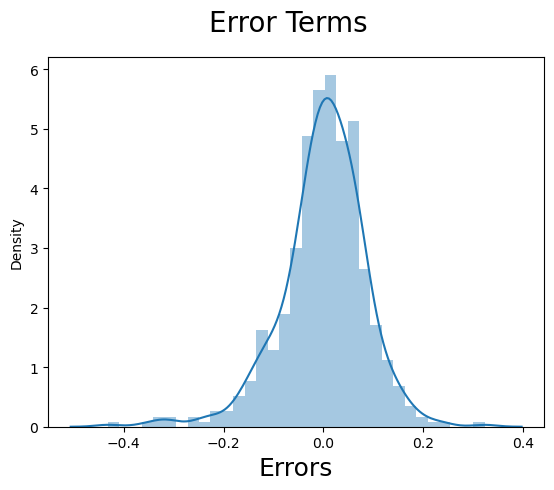

In [382]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [418]:
r2_score(Y_train,y_train_pred)

0.8533032523096307

Text(0, 0.5, 'y_train_pred')

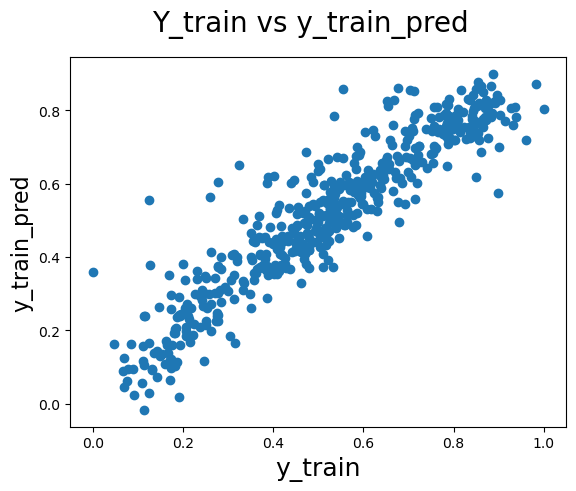

In [411]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_train,y_train_pred)
fig.suptitle('Y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)  

## Making Predictions


#### Applying the scaling on the test sets

In [391]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,-0.056692,0.006580,-0.080891,0.255708,0.264840,0.232877,0.059361,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.007102,0.001535,0.005132,0.437258,0.442259,0.423633,0.236840,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,-0.072263,0.002699,-0.092319,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.062901,0.005433,-0.084576,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,-0.056700,0.006469,-0.081337,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,-0.050609,0.007666,-0.078013,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,-0.043761,0.010327,-0.065037,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [394]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

#### Dividing into X_test and y_test


In [395]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [396]:
# Adding constant
X_test_sm = sm.add_constant(X_test)


In [397]:
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [398]:
#Columns from our final model
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_light', 'weathersit_mist']



In [404]:
#Predict the values for test data
y_test_pred = lm.predict(X_test)

### Evaluating the model

In [406]:
from sklearn.metrics import r2_score

Text(0, 0.5, 'y_pred')

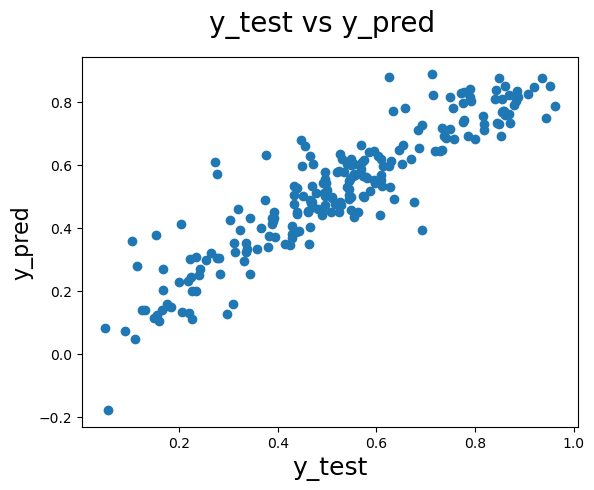

In [407]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

### Computing R squared value between test and predicted test data sets 

In [413]:
r2_score(y_test,y_test_pred)

0.8275257527788901

### Plot Test vs Predicted test values

In [416]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)    

## r2 values from train and test data:
- r2 value from trained data: 0.8533032523096307
- r2 value from test data: 0.8275257527788901

Insight: The values are very close which indicates that the prediction in appropriate.

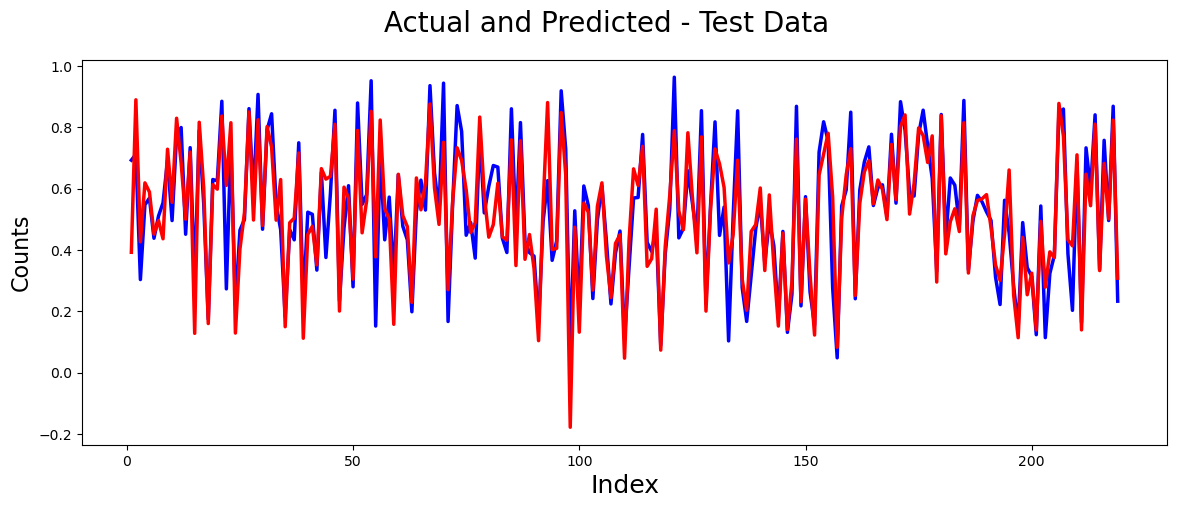

In [417]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

# Final Summary

### Variables that are significant in predicting the demand for shared bikes and how well these variables describe the bike demands:

1. 'yr'
2. 'holiday'
3. 'temp'
4. 'windspeed'
5. 'season_spring'
6. 'season_winter'
7. 'mnth_Dec'
8. 'mnth_Jan'
9. 'mnth_Jul'
10. 'mnth_Nov'
11. 'mnth_Sep'
12. 'weathersit_light'
13. 'weathersit_mist'


- There is more demand in 2019 that 2018 which indicates that the demand would increase in the upcoming years once the pandemic situation is normal.
- There is more demand in fall and spring seasons.
- Month of September has the highest demand.
